## **Importing libraries and loading data from .mat files**
Variables of loading data from simulations explanation:



1.   letter "B" in variable - ballistic trajectory
2. letter "N" in variable - terminal phase diving
3.   letter "P" in variable - terminal phase diving after straightening the flight of the rocket in the terminal phase
4. letter "P" and "B" - ballistic trajectory with straightening the flight of the rocket in the terminal phase
5. number mean the pitch angle of the rocket after the start phase


In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import statistics
import itertools
from scipy.interpolate import make_interp_spline


# function which convert .mat file into Pandas DataFrame
def load_matlab_file(file_name):
  mat = scipy.io.loadmat(file_name)
  return pd.DataFrame(mat['data'], columns=['t', 'x', 'y', 'z', 'U', 'V', 'W', '|V|', 'U_dot', 'V_dot', 'W_dot',
                                   'g', 'n_x', 'n_y', 'n_z', 'n', 'phi', 'theta', 'psi', 'alfa', 
                                   'beta', 'alfa_t', 'delta_w', 'delta_k', 'delta_w_T', 'delta_k_T', 'P', 'Q', 'R', 'x_sm', 'x_sp'])

# loading and convert 53 data files from different simulations
P_B_0 = load_matlab_file('0_P_B')
B_0 = load_matlab_file('0_B')
P_0 = load_matlab_file('0_P')
N_0 = load_matlab_file('0_184_N')

P_B_10 = load_matlab_file('10_P_B')
B_10 = load_matlab_file('10_B')
P_10 = load_matlab_file('10_P')
N_10 = load_matlab_file('10_240_N')

P_B_13 = load_matlab_file('13_P_B')
B_13 = load_matlab_file('13_B')
P_13 = load_matlab_file('13_P')
N_13 = load_matlab_file('13_265_N')

P_B_15 = load_matlab_file('15_P_B')
B_15 = load_matlab_file('15_B')
P_15 = load_matlab_file('15_P')
N_15 = load_matlab_file('15_286_N')

P_B_17 = load_matlab_file('17_P_B')
B_17 = load_matlab_file('17_B')
P_17 = load_matlab_file('17_P')
N_17 = load_matlab_file('17_337_N')

P_B_20 = load_matlab_file('20_P_B')
B_20 = load_matlab_file('20_B')
P_20 = load_matlab_file('20_P')
N_20 = load_matlab_file('20_363_N')

P_B_22 = load_matlab_file('22_P_B')
B_22 = load_matlab_file('22_B')
P_22 = load_matlab_file('22_P')
N_22 = load_matlab_file('22_391_N')

P_B_25 = load_matlab_file('25_P_B')
B_25 = load_matlab_file('25_B')
P_25 = load_matlab_file('25_P')
N_25 = load_matlab_file('25_432_N')

P_B_30 = load_matlab_file('30_P_B')
B_30 = load_matlab_file('30_B')
P_30 = load_matlab_file('30_P')
N_30 = load_matlab_file('30_491_N')

P_B_35 = load_matlab_file('35_P_B')
B_35 = load_matlab_file('35_B')
P_35 = load_matlab_file('35_P')
N_35 = load_matlab_file('35_537_N')

P_B_40 = load_matlab_file('40_P_B')
B_40 = load_matlab_file('40_B')
P_40 = load_matlab_file('40_P')
N_40 = load_matlab_file('40_563_N')


# Data contained in DataFrames
column designations are described in mathematics_identification.txt

In [ ]:
N_22.head()

,t,x,y,z,U,V,W,|V|,U_dot,V_dot,...,alfa_t,delta_w,delta_k,delta_w_T,delta_k_T,P,Q,R,x_sm,x_sp
0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000001,0.0,0.000000e+00,0.000001,25.774607,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,4.122993,0.000001
1,3.773504e-30,2.310605e-52,0.0,-3.773504e-36,0.000001,0.0,2.265929e-45,0.000001,25.774607,0.0,...,0.0,0.0,0.0,5.118421e-79,0.0,0.0,-1.349002e-81,0.0,4.122993,0.000001
2,1.947970e-04,8.268567e-23,0.0,-9.782377e-07,0.005022,0.0,1.169725e-19,0.005022,25.774695,0.0,...,0.0,0.0,0.0,6.817988e-28,0.0,0.0,-1.795865e-30,0.0,4.123150,0.005322
3,5.843909e-04,-4.798673e-21,0.0,-4.890806e-06,0.015064,0.0,3.509175e-19,0.015064,25.774870,0.0,...,0.0,0.0,0.0,-3.963668e-26,0.0,0.0,4.199391e-28,0.0,4.123139,0.015964
4,9.739848e-04,1.595716e-20,0.0,-1.271557e-05,0.025105,0.0,-3.285402e-18,0.025105,25.775045,0.0,...,0.0,0.0,0.0,-3.199334e-14,0.0,0.0,2.603329e-16,0.0,4.123129,0.026606


In [ ]:
N_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   t          2570 non-null   float64
 1   x          2570 non-null   float64
 2   y          2570 non-null   float64
 3   z          2570 non-null   float64
 4   U          2570 non-null   float64
 5   V          2570 non-null   float64
 6   W          2570 non-null   float64
 7   |V|        2570 non-null   float64
 8   U_dot      2570 non-null   float64
 9   V_dot      2570 non-null   float64
 10  W_dot      2570 non-null   float64
 11  g          2570 non-null   float64
 12  n_x        2570 non-null   float64
 13  n_y        2570 non-null   float64
 14  n_z        2570 non-null   float64
 15  n          2570 non-null   float64
 16  phi        2570 non-null   float64
 17  theta      2570 non-null   float64
 18  psi        2570 non-null   float64
 19  alfa       2570 non-null   float64
 20  beta    

# Comparison plots
### Full trajectory for different distances to the target
1. Terminal phase diving

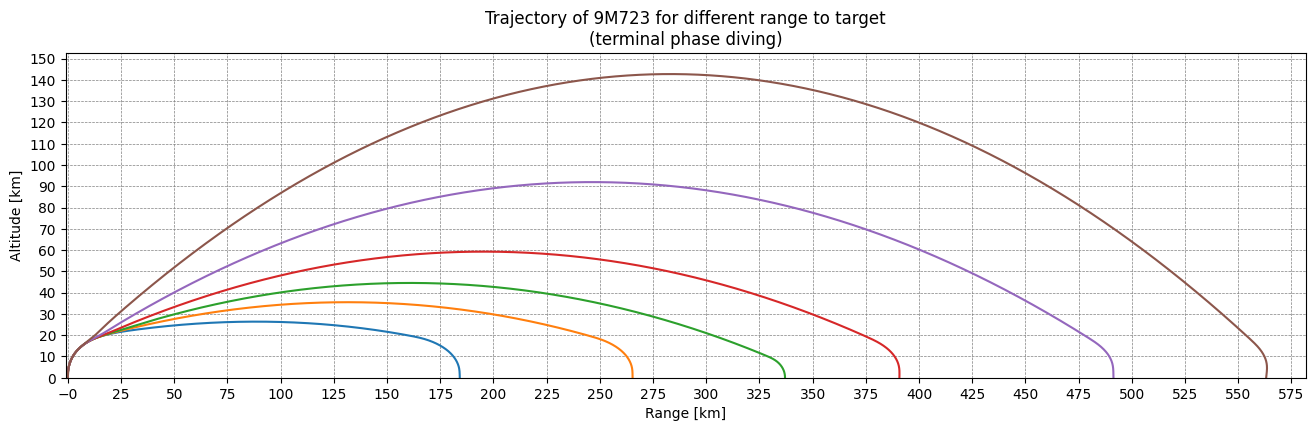

In [ ]:
# size of the figure
plt.figure(figsize=(16,10), dpi=100)

# plotting
fig = plt.plot(N_0.x/1000, -N_0.z/1000)
plt.plot(N_13.x/1000, -N_13.z/1000)
plt.plot(N_17.x/1000, -N_17.z/1000)
plt.plot(N_22.x/1000, -N_22.z/1000)
plt.plot(N_30.x/1000, -N_30.z/1000)
plt.plot(N_40.x/1000, -N_40.z/1000)

# axis settings
plt.xlim(min(P_40.x)/1000-1, max(P_40.x)/1000 + 10)
plt.ylim(min(-P_40.z)/1000, max(-P_40.z)/1000 + 10)
plt.xticks(np.arange(min(P_40.x/1000), max(P_40.x/1000)+25, 25.0))
plt.yticks(np.arange(min(-P_40.z/1000), max(-P_40.z/1000)+10, 10.0))

# axis description and grid settings
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Altitude [km]')
plt.xlabel('Range [km]')

# figure title
plt.title('Trajectory of 9M723 for different range to target\n(terminal phase diving)')

# show figure
plt.show()

2. Ballistic trajectory

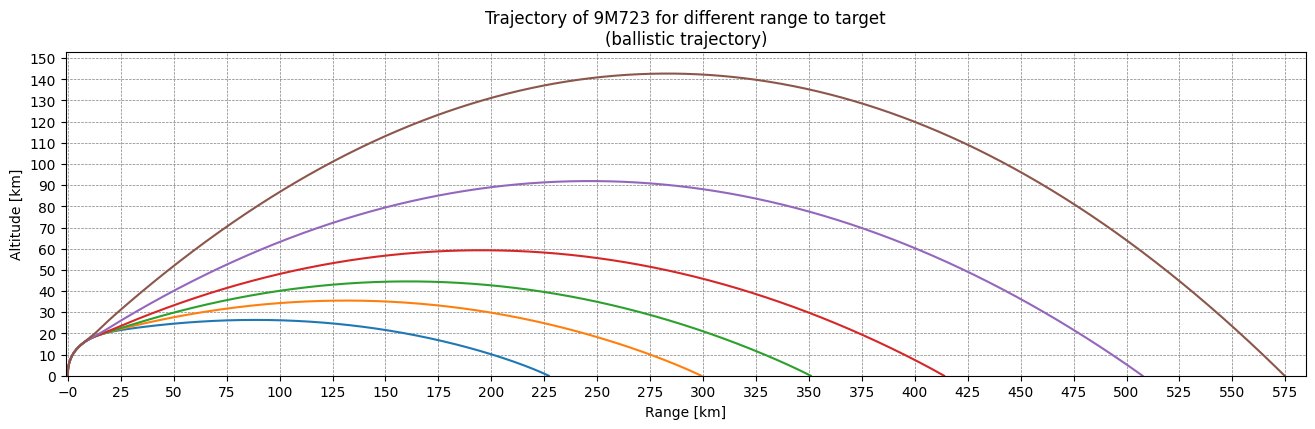

In [ ]:
# size of the figure
plt.figure(figsize=(16,10), dpi=100)

# plotting
fig = plt.plot(B_0.x/1000, -B_0.z/1000)
plt.plot(B_13.x/1000, -B_13.z/1000)
plt.plot(B_17.x/1000, -B_17.z/1000)
plt.plot(B_22.x/1000, -B_22.z/1000)
plt.plot(B_30.x/1000, -B_30.z/1000)
plt.plot(B_40.x/1000, -B_40.z/1000)

# axis settings
plt.xlim(min(B_40.x)/1000-1, max(B_40.x)/1000 + 10)
plt.ylim(min(-B_40.z)/1000, max(-B_40.z)/1000 + 10)
plt.xticks(np.arange(min(B_40.x/1000), max(B_40.x/1000)+25, 25.0))
plt.yticks(np.arange(min(-B_40.z/1000), max(-B_40.z/1000)+10, 10.0))

# axis description and grid settings
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Altitude [km]')
plt.xlabel('Range [km]')

# figure title
plt.title('Trajectory of 9M723 for different range to target\n(ballistic trajectory)')

# show figure
plt.show()

3. Terminal phase diving after straightening the flight

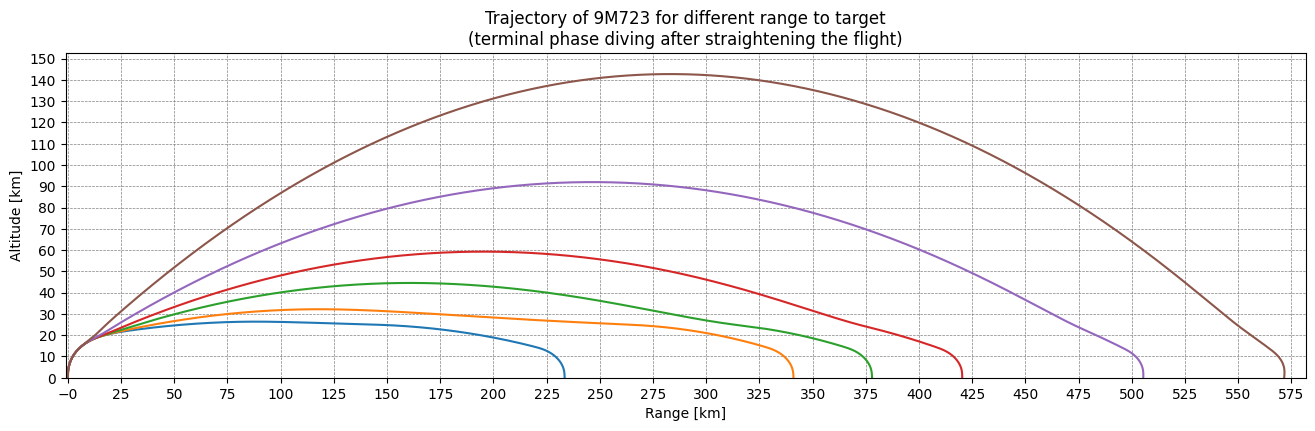

In [ ]:
# size of the figure
plt.figure(figsize=(16,10), dpi=100)

# plotting
fig = plt.plot(P_0.x/1000, -P_0.z/1000)
plt.plot(P_10.x/1000, -P_10.z/1000)
plt.plot(P_17.x/1000, -P_17.z/1000)
plt.plot(P_22.x/1000, -P_22.z/1000)
plt.plot(P_30.x/1000, -P_30.z/1000)
plt.plot(P_40.x/1000, -P_40.z/1000)

# axis settings
plt.xlim(min(P_40.x)/1000-1, max(P_40.x)/1000 + 10)
plt.ylim(min(-P_40.z)/1000, max(-P_40.z)/1000 + 10)
plt.xticks(np.arange(min(P_40.x/1000), max(P_40.x/1000)+25, 25.0))
plt.yticks(np.arange(min(-P_40.z/1000), max(-P_40.z/1000)+10, 10.0))

# axis description and grid settings
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Altitude [km]')
plt.xlabel('Range [km]')

# figure title
plt.title('Trajectory of 9M723 for different range to target\n(terminal phase diving after straightening the flight)')

# show figure
plt.show()

## Maneuverability in the final phase of flight
1. In case a flight of approximately 300 km

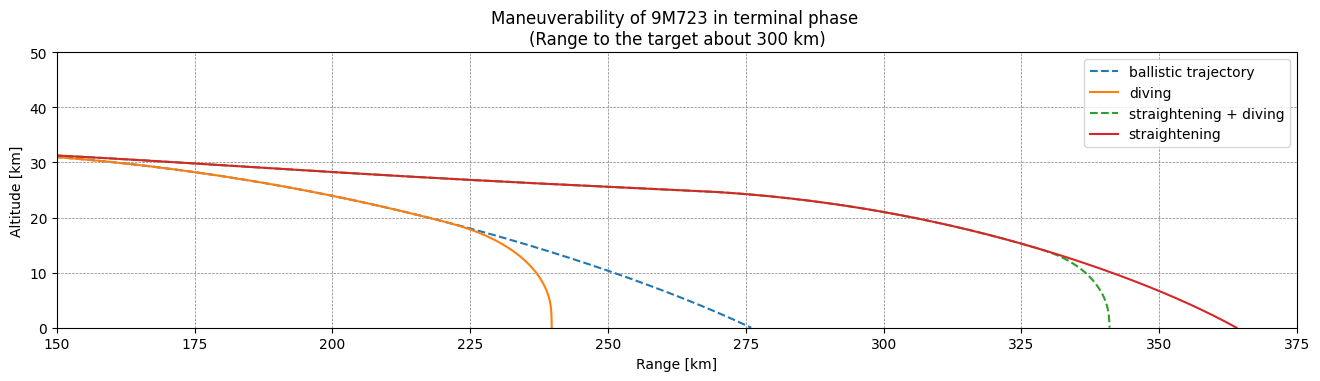

In [ ]:
# size of the figure
plt.figure(figsize=(16,10), dpi=100)

# plotting
fig = plt.plot(B_10.x/1000, -B_10.z/1000, '--')
plt.plot(N_10.x/1000, -N_10.z/1000)
plt.plot(P_10.x/1000, -P_10.z/1000, '--')
plt.plot(P_B_10.x/1000, -P_B_10.z/1000)

# axis settings
plt.xlim(150, max(N_10.x)/1000 + 10)
plt.ylim(min(-N_10.z)/1000, 50)
plt.xticks(np.arange(150, max(P_B_10.x/1000)+25, 25.0))
plt.yticks(np.arange(min(-N_10.z/1000), 50, 10.0))

# axis description and grid settings
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Altitude [km]')
plt.xlabel('Range [km]')

#  legend description
plt.legend(['ballistic trajectory', 'diving', 'straightening + diving', 'straightening'])

# figure title
plt.title('Maneuverability of 9M723 in terminal phase \n(Range to the target about 300 km)')

# show figure
plt.show()

2. In case a flight of approximately 400 km

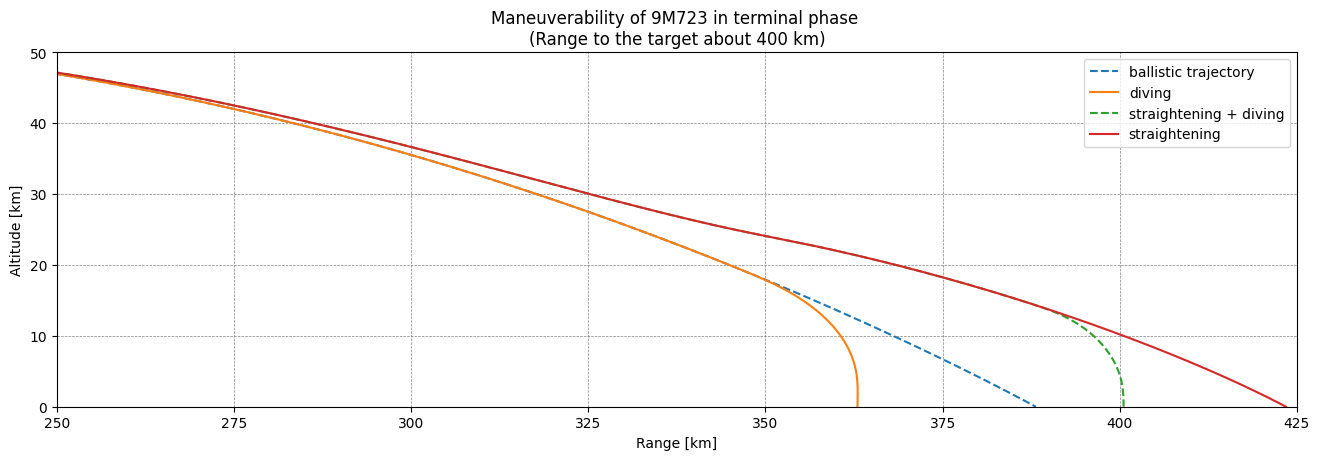

In [ ]:
# size of the figure
plt.figure(figsize=(16,10), dpi=100)

# plotting
fig = plt.plot(B_20.x/1000, -B_20.z/1000, '--')
plt.plot(N_20.x/1000, -N_20.z/1000)
plt.plot(P_20.x/1000, -P_20.z/1000, '--')
plt.plot(P_B_20.x/1000, -P_B_20.z/1000)

# axis settings
plt.xlim(250, max(N_20.x)/1000 + 10)
plt.ylim(min(-N_20.z)/1000, 50)
plt.xticks(np.arange(250, max(P_B_20.x/1000)+25, 25.0))
plt.yticks(np.arange(min(-N_20.z/1000), 50, 10.0))

# axis description and grid settings
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Altitude [km]')
plt.xlabel('Range [km]')

#  legend description
plt.legend(['ballistic trajectory', 'diving', 'straightening + diving', 'straightening'])

# figure title
plt.title('Maneuverability of 9M723 in terminal phase \n(Range to the target about 400 km)')

# show figure
plt.show()

3. In case a flight of approximately 500 km

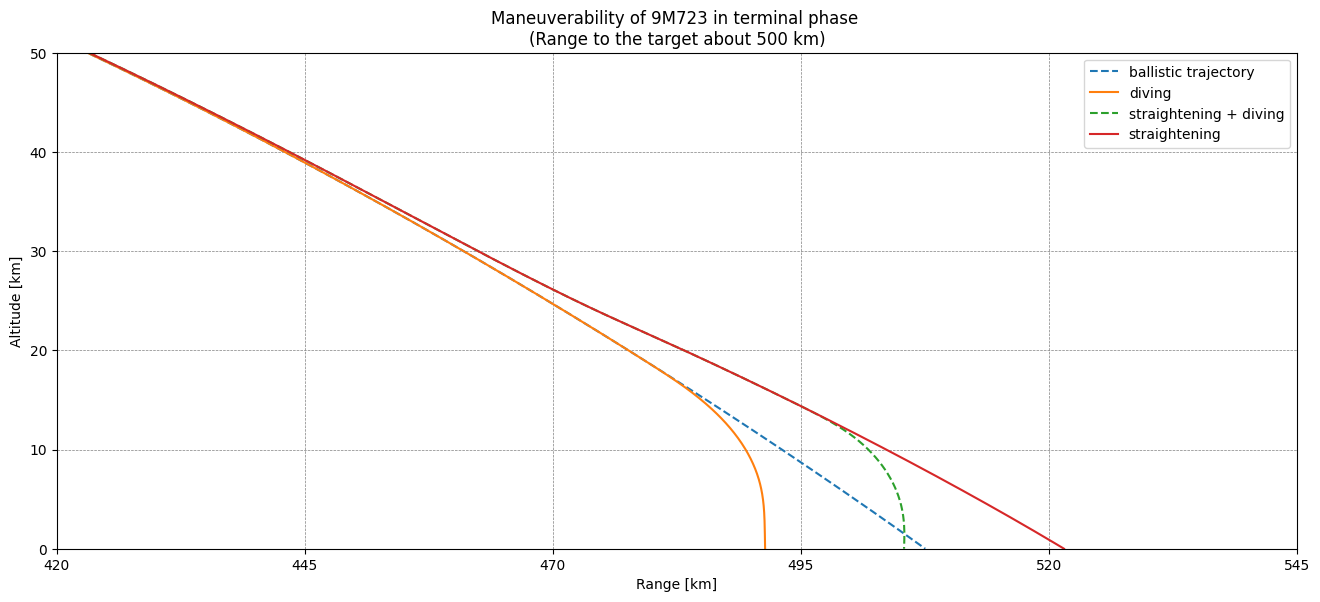

In [ ]:
# figure size
plt.figure(figsize=(16,10), dpi=100)

# plotting
fig = plt.plot(B_30.x/1000, -B_30.z/1000, '--')
plt.plot(N_30.x/1000, -N_30.z/1000)
plt.plot(P_30.x/1000, -P_30.z/1000, '--')
plt.plot(P_B_30.x/1000, -P_B_30.z/1000)

#  axis settings
plt.xlim(420, max(N_30.x)/1000 + 10)
plt.ylim(min(-N_20.z)/1000, 50)
plt.xticks(np.arange(420, max(P_B_30.x/1000)+25, 25.0))
plt.yticks(np.arange(min(-N_30.z/1000), 50, 10.0))

# axis description and grid settings
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Altitude [km]')
plt.xlabel('Range [km]')

#  legend description
plt.legend(['ballistic trajectory', 'diving', 'straightening + diving', 'straightening'])

# figure title
plt.title('Maneuverability of 9M723 in terminal phase \n(Range to the target about 500 km)')

# show figure
plt.show()

## Boost phase results
Trajectory during boost phase for different ranges

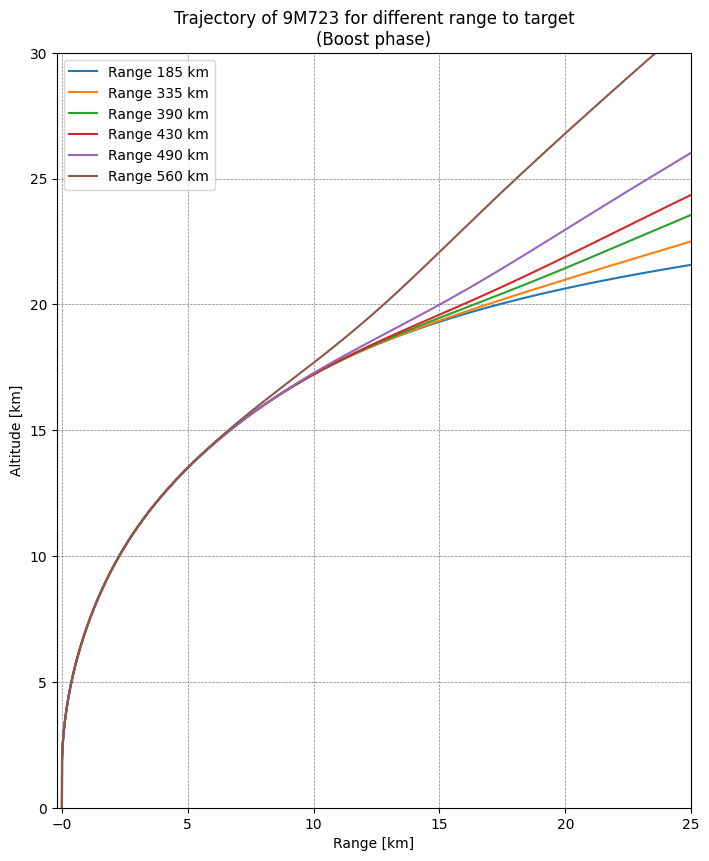

In [ ]:
# size of the figure
plt.figure(figsize=(16,10), dpi=100)

# plotting
fig = plt.plot(N_0.x/1000, -N_0.z/1000)

plt.plot(N_17.x/1000, -N_17.z/1000)
plt.plot(N_22.x/1000, -N_22.z/1000)
plt.plot(N_25.x/1000, -N_25.z/1000)
plt.plot(N_30.x/1000, -N_30.z/1000)
plt.plot(N_40.x/1000, -N_40.z/1000)

# axis settings
plt.xlim(min(P_40.x)/1000-0.2, 25)
plt.ylim(min(-P_40.z)/1000, 30)
plt.xticks(np.arange(min(P_40.x/1000), 25, 5.0))
plt.yticks(np.arange(min(-P_40.z/1000), 30, 5.0))

# axis description and grid settings
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Altitude [km]')
plt.xlabel('Range [km]')

# figure title and legend
plt.title('Trajectory of 9M723 for different range to target\n(Boost phase)')
plt.legend(['Range 185 km', 'Range 335 km', 'Range 390 km', 'Range 430 km', 'Range 490 km', 'Range 560 km'])

# show figure
plt.show()

Velocity after boost phase for different ranges

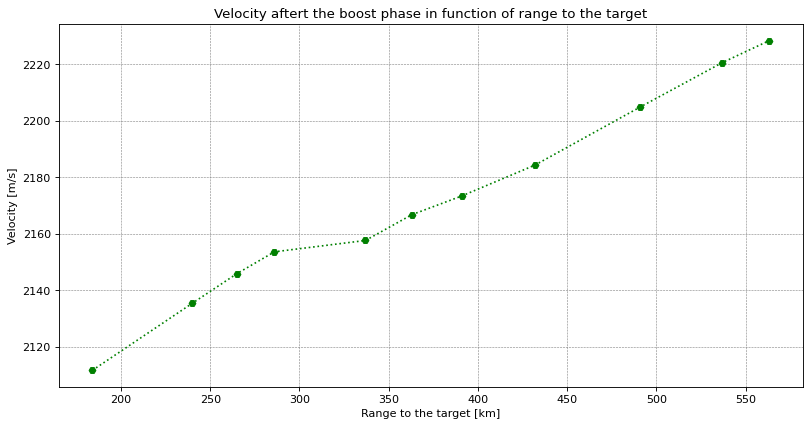

In [ ]:
# Extract data from DataFrames (velocity for t=50 s)
v_max_0 = N_0.loc[N_0.t == 50, '|V|'].values[0]
v_max_10 = N_10.loc[N_10.t == 50, '|V|'].values[0]
v_max_13 = N_13.loc[N_13.t == 50, '|V|'].values[0]
v_max_15 = N_15.loc[N_15.t == 50, '|V|'].values[0]
v_max_17 = N_17.loc[N_17.t == 50, '|V|'].values[0]
v_max_20 = N_20.loc[N_20.t == 50, '|V|'].values[0]
v_max_22 = N_22.loc[N_22.t == 50, '|V|'].values[0]
v_max_25 = N_25.loc[N_25.t == 50, '|V|'].values[0]
v_max_30 = N_30.loc[N_30.t == 50, '|V|'].values[0]
v_max_35 = N_35.loc[N_35.t == 50, '|V|'].values[0]
v_max_40 = N_40.loc[N_40.t == 50, '|V|'].values[0]

# create a list with extracted data
v_max = [v_max_0, v_max_10, v_max_13, v_max_15, v_max_17, v_max_20, v_max_22, v_max_25, v_max_30, v_max_35, v_max_40]
range = [184, 240, 265, 286, 337, 363, 391, 432, 491, 537, 563]

# size of the figure
plt.figure(figsize=(12,6), dpi=80)

# plotting
fig = plt.plot(range, v_max, color='green', marker='H', linestyle=':', linewidth=1.5, markersize=6)

# axis description and grid settings
ax = plt.gca()
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.xlabel('Range to the target [km]')

# figure title and legend
plt.title('Velocity aftert the boost phase in function of range to the target')

# show figure
plt.show()

## Terminal phase results
Rocket velocity for different versions of the trajectory in the terminal phase

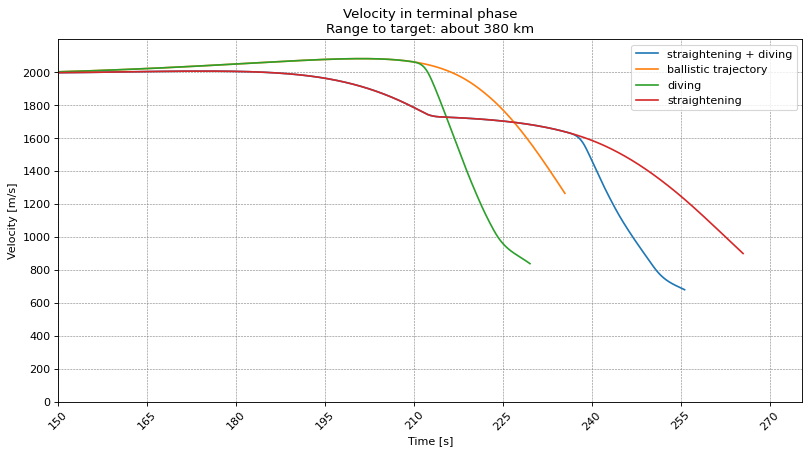

In [ ]:
# figure size
plt.figure(figsize=(12,6), dpi=80)

# plotting
fig = plt.plot(P_20.t, P_20['|V|'], B_20.t, B_20['|V|'], N_20.t, N_20['|V|'], P_B_20.t, P_B_20['|V|'])

# axis description and grid settings
ax = plt.gca()
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.xlabel('Time [s]')

# axis settings
plt.xlim(150, max(P_B_20.t)+10)
plt.ylim(min(P_B_20['|V|']), 2200)
plt.xticks(np.arange(150, max(P_B_20.t)+10, 15.0))
plt.yticks(np.arange(0, 2200, 200.0));
plt.xticks(rotation=45)

#  legend description and figure title
plt.legend(['straightening + diving', 'ballistic trajectory', 'diving', 'straightening'])
plt.title('Velocity in terminal phase\nRange to target: about 380 km')

# show figure
plt.show()

Comparison of the terminal velocity for different distances to the target and types of trajectories

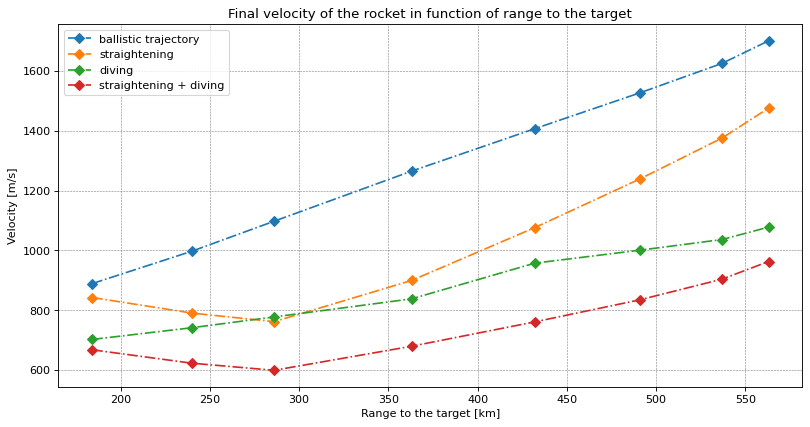

In [ ]:
# Extract data from DataFrames (velocity for end of the flight)
v_end_P_B = [P_B_0['|V|'].values[-1], P_B_10['|V|'].values[-1], P_B_15['|V|'].values[-1], P_B_20['|V|'].values[-1], P_B_25['|V|'].values[-1], P_B_30['|V|'].values[-1], P_B_35['|V|'].values[-1], P_B_40['|V|'].values[-1]]
v_end_P = [P_0['|V|'].values[-1], P_10['|V|'].values[-1], P_15['|V|'].values[-1], P_20['|V|'].values[-1], P_25['|V|'].values[-1], P_30['|V|'].values[-1], P_35['|V|'].values[-1], P_40['|V|'].values[-1]]
v_end_B = [B_0['|V|'].values[-1], B_10['|V|'].values[-1], B_15['|V|'].values[-1], B_20['|V|'].values[-1], B_25['|V|'].values[-1], B_30['|V|'].values[-1], B_35['|V|'].values[-1], B_40['|V|'].values[-1]]
v_end_N = [N_0['|V|'].values[-1], N_10['|V|'].values[-1], N_15['|V|'].values[-1], N_20['|V|'].values[-1], N_25['|V|'].values[-1], N_30['|V|'].values[-1], N_35['|V|'].values[-1], N_40['|V|'].values[-1]]

range = [184, 240, 286, 363, 432, 491, 537, 563]

# figure size
plt.figure(figsize=(12,6), dpi=80)

# plotting
fig = plt.plot(range, v_end_B, marker='D', linestyle='-.', linewidth=1.5, markersize=6)
plt.plot(range, v_end_P_B, marker='D', linestyle='-.', linewidth=1.5, markersize=6)
plt.plot(range, v_end_N, marker='D', linestyle='-.', linewidth=1.5, markersize=6)
plt.plot(range, v_end_P, marker='D', linestyle='-.', linewidth=1.5, markersize=6)

# axis description and grid settings
ax = plt.gca()
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.xlabel('Range to the target [km]')

# figure title and legend
plt.title('Final velocity of the rocket in function of range to the target')
plt.legend([ 'ballistic trajectory', 'straightening', 'diving',  'straightening + diving'])

# show figure
plt.show()


G-force for diffrent types of trajectory

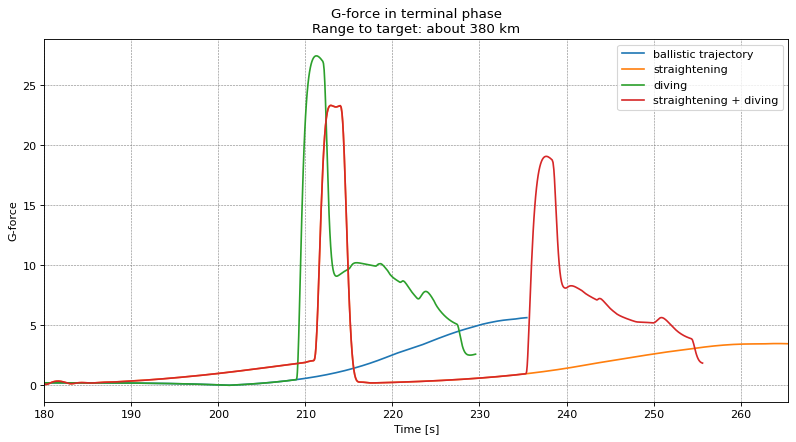

In [ ]:
# figure size
plt.figure(figsize=(12,6), dpi=80)

# plotting
fig = plt.plot(B_20.t, B_20.n, P_B_20.t, P_B_20.n, N_20.t, N_20.n, P_20.t, P_20.n)

# axis description and grid settings
ax = plt.gca()
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('G-force')
plt.xlabel('Time [s]')

# axis settings
plt.xlim(180, max(P_B_20.t))

#  legend description and figure title
plt.legend([ 'ballistic trajectory', 'straightening', 'diving',  'straightening + diving'])
plt.title('G-force in terminal phase\nRange to target: about 380 km')

# show figure
plt.show()

## Velocity statistics

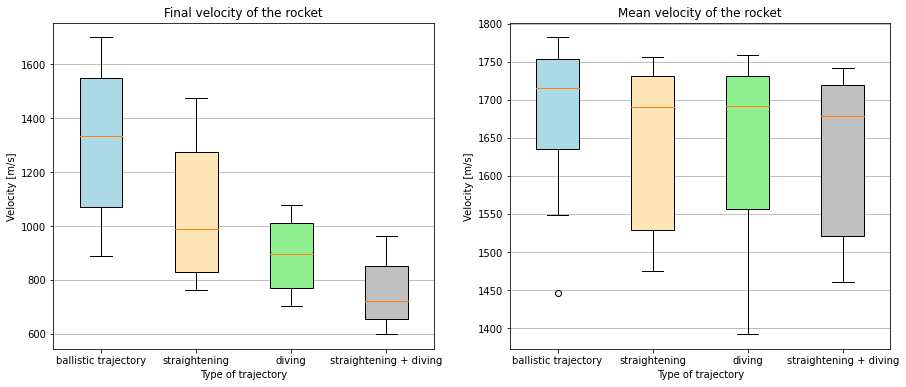

In [ ]:
# Extract data from DataFrames (mean velocity of the flight)
v_mean_P_B = [P_B_0['|V|'].mean(), P_B_10['|V|'].mean(), P_B_15['|V|'].mean(), P_B_20['|V|'].mean(), P_B_25['|V|'].mean(), P_B_30['|V|'].mean(), P_B_35['|V|'].mean(), P_B_40['|V|'].mean()]
v_mean_P = [P_0['|V|'].mean(), P_10['|V|'].mean(), P_15['|V|'].mean(), P_20['|V|'].mean(), P_25['|V|'].mean(), P_30['|V|'].mean(), P_35['|V|'].mean(), P_40['|V|'].mean()]
v_mean_B = [B_0['|V|'].mean(), B_10['|V|'].mean(), B_15['|V|'].mean(), B_20['|V|'].mean(), B_25['|V|'].mean(), B_30['|V|'].mean(), B_35['|V|'].mean(), B_40['|V|'].mean()]
v_mean_N = [N_0['|V|'].mean(), N_10['|V|'].mean(), N_15['|V|'].mean(), N_20['|V|'].mean(), N_25['|V|'].mean(), N_30['|V|'].mean(), N_35['|V|'].mean(), N_40['|V|'].mean()]

# save data in list
v_mean = [v_mean_B, v_mean_P_B, v_mean_N, v_mean_P]
v_end = [v_end_B, v_end_P_B, v_end_N, v_end_P]

# create subplot figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# name labels
labels = ['ballistic trajectory', 'straightening', 'diving',  'straightening + diving']

# crete 2 box plots
bplot1 = ax1.boxplot(v_end,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels) # name x-ticks

bplot2 = ax2.boxplot(v_mean,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # name x-ticks

# first box plot settings
ax1.set_title('Final velocity of the rocket')
ax1.yaxis.grid(True)
ax1.set_xlabel('Type of trajectory')
ax1.set_ylabel('Velocity [m/s]');

# second box plot settings
ax2.set_title('Mean velocity of the rocket')
ax2.yaxis.grid(True)
ax2.set_xlabel('Type of trajectory')
ax2.set_ylabel('Velocity [m/s]');

# chane collor of the bars
colors = ['lightblue', 'moccasin', 'lightgreen', 'silver']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# show figure
plt.show()

## Time of flight

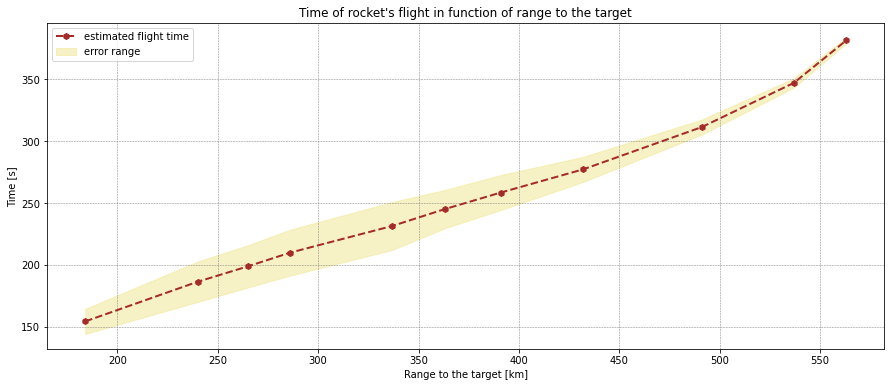

In [ ]:
# Extract data from DataFrames (time of flight)
t_0 = N_0.t.values[-1]
t_10 = N_10.t.values[-1]
t_13 = N_13.t.values[-1]
t_15 = N_15.t.values[-1]
t_17 = N_17.t.values[-1]
t_20 = N_20.t.values[-1]
t_22 = N_22.t.values[-1]
t_25 = N_25.t.values[-1]
t_30 = N_30.t.values[-1]
t_35 = N_35.t.values[-1]
t_40 = N_40.t.values[-1]

t2_0 = P_B_0.t.values[-1]
t2_10 = P_B_10.t.values[-1]
t2_13 = P_B_13.t.values[-1]
t2_15 = P_B_15.t.values[-1]
t2_17 = P_B_17.t.values[-1]
t2_20 = P_B_20.t.values[-1]
t2_22 = P_B_22.t.values[-1]
t2_25 = P_B_25.t.values[-1]
t2_30 = P_B_30.t.values[-1]
t2_35 = P_B_35.t.values[-1]
t2_40 = P_B_40.t.values[-1]

# save data in list
range = [184, 240, 265, 286, 337, 363, 391, 432, 491, 537, 563]
t_end = [t_0, t_10, t_13, t_15, t_17, t_20, t_22, t_25, t_30, t_35, t_40]
t2_end = [t2_0-20, t2_10-45, t2_13-45, t2_15-35, t2_17-10, t2_20-5, t2_22, t2_25, t2_30, t2_35, t2_40]


# figure size
fig, ax = plt.subplots(figsize=(15, 6))

# plot
ax.fill_between(range, t_end, t2_end, alpha=.5, linewidth=1, color='khaki')
ax.plot(np.asarray(range), (np.asarray(t_end) + np.asarray(t2_end))/2, color='brown', marker='h', linestyle='--', linewidth=2, markersize=6)

# axis description and grid settings
ax = plt.gca()
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Time [s]')
plt.xlabel('Range to the target [km]');

# figure title and legend
plt.title("Time of rocket's flight in function of range to the target")
plt.legend(['estimated flight time', 'error range'])

# show figure
plt.show()

## Time in interception area (H < 20 km)
Data manipulation

In [ ]:
# Extract data from DataFrames for diving trajectory (time of flight in terminal phase H < 20 km)
t_0 = N_0.loc[(N_0.z > -20000) & (N_0.x > 30000) , 't']
t_10 = N_10.loc[(N_10.z > -20000) & (N_10.x > 30000) , 't']
t_13 = N_13.loc[(N_13.z > -20000) & (N_13.x > 30000) , 't']
t_15 = N_15.loc[(N_15.z > -20000) & (N_15.x > 30000) , 't']
t_17 = N_17.loc[(N_17.z > -20000) & (N_17.x > 30000) , 't']
t_20 = N_20.loc[(N_20.z > -20000) & (N_20.x > 30000) , 't']
t_22 = N_22.loc[(N_22.z > -20000) & (N_22.x > 30000) , 't']
t_25 = N_25.loc[(N_25.z > -20000) & (N_25.x > 30000) , 't']
t_30 = N_30.loc[(N_30.z > -20000) & (N_30.x > 30000) , 't']
t_35 = N_35.loc[(N_35.z > -20000) & (N_35.x > 30000) , 't']
t_40 = N_40.loc[(N_40.z > -20000) & (N_40.x > 30000) , 't']

# create a list with extracted data
t_N = [t_0, t_10, t_13, t_15, t_17, t_20, t_22, t_25, t_30, t_35, t_40]


# Extract data from DataFrames for straightening + diving trajectory (time of flight in terminal phase H < 20 km)
t_0 = P_0.loc[(P_0.z > -20000) & (P_0.x > 30000) , 't']
t_10 = P_10.loc[(P_10.z > -20000) & (P_10.x > 30000) , 't']
t_13 = P_13.loc[(P_13.z > -20000) & (P_13.x > 30000) , 't']
t_15 = P_15.loc[(P_15.z > -20000) & (P_15.x > 30000) , 't']
t_17 = P_17.loc[(P_17.z > -20000) & (P_17.x > 30000) , 't']
t_20 = P_20.loc[(P_20.z > -20000) & (P_20.x > 30000) , 't']
t_22 = P_22.loc[(P_22.z > -20000) & (P_22.x > 30000) , 't']
t_25 = P_25.loc[(P_25.z > -20000) & (P_25.x > 30000) , 't']
t_30 = P_30.loc[(P_30.z > -20000) & (P_30.x > 30000) , 't']
t_35 = P_35.loc[(P_35.z > -20000) & (P_35.x > 30000) , 't']
t_40 = P_40.loc[(P_40.z > -20000) & (P_40.x > 30000) , 't']

# create a list with extracted data
t_P = [t_0, t_10, t_13, t_15, t_17, t_20, t_22, t_25, t_30, t_35, t_40]


# Extract data from DataFrames for ballistic trajectory (time of flight in terminal phase H < 20 km)
t_0 = B_0.loc[(B_0.z > -20000) & (B_0.x > 30000) , 't']
t_10 = B_10.loc[(B_10.z > -20000) & (B_10.x > 30000) , 't']
t_13 = B_13.loc[(B_13.z > -20000) & (B_13.x > 30000) , 't']
t_15 = B_15.loc[(B_15.z > -20000) & (B_15.x > 30000) , 't']
t_17 = B_17.loc[(B_17.z > -20000) & (B_17.x > 30000) , 't']
t_20 = B_20.loc[(B_20.z > -20000) & (B_20.x > 30000) , 't']
t_22 = B_22.loc[(B_22.z > -20000) & (B_22.x > 30000) , 't']
t_25 = B_25.loc[(B_25.z > -20000) & (B_25.x > 30000) , 't']
t_30 = B_30.loc[(B_30.z > -20000) & (B_30.x > 30000) , 't']
t_35 = B_35.loc[(B_35.z > -20000) & (B_35.x > 30000) , 't']
t_40 = B_40.loc[(B_40.z > -20000) & (B_40.x > 30000) , 't']

# create a list with extracted data
t_B = [t_0, t_10, t_13, t_15, t_17, t_20, t_22, t_25, t_30, t_35, t_40]


# Extract data from DataFrames for straightening trajectory (time of flight in terminal phase H < 20 km)
t_0 = P_B_0.loc[(P_B_0.z > -20000) & (P_B_0.x > 30000) , 't']
t_10 = P_B_10.loc[(P_B_10.z > -20000) & (P_B_10.x > 30000) , 't']
t_13 = P_B_13.loc[(P_B_13.z > -20000) & (P_B_13.x > 30000) , 't']
t_15 = P_B_15.loc[(P_B_15.z > -20000) & (P_B_15.x > 30000) , 't']
t_17 = P_B_17.loc[(P_B_17.z > -20000) & (P_B_17.x > 30000) , 't']
t_20 = P_B_20.loc[(P_B_20.z > -20000) & (P_B_20.x > 30000) , 't']
t_22 = P_B_22.loc[(P_B_22.z > -20000) & (P_B_22.x > 30000) , 't']
t_25 = P_B_25.loc[(P_B_25.z > -20000) & (P_B_25.x > 30000) , 't']
t_30 = P_B_30.loc[(P_B_30.z > -20000) & (P_B_30.x > 30000) , 't']
t_35 = P_B_35.loc[(P_B_35.z > -20000) & (P_B_35.x > 30000) , 't']
t_40 = P_B_40.loc[(P_B_40.z > -20000) & (P_B_40.x > 30000) , 't']

# create a list with extracted data
t_P_B = [t_0, t_10, t_13, t_15, t_17, t_20, t_22, t_25, t_30, t_35, t_40]


# calculate time in area
t_N = [t_i.values[-1] - t_i.values[0] for t_i in t_N]
t_P = [t_i.values[-1] - t_i.values[0] for t_i in t_P]
t_B = [t_i.values[-1] - t_i.values[0] for t_i in t_B]
t_P_B = [t_i.values[-1] - t_i.values[0] for t_i in t_P_B]
range = [184, 240, 265, 286, 337, 363, 391, 432, 491, 537, 563]


Plotting time in interception area (H < 20 km)

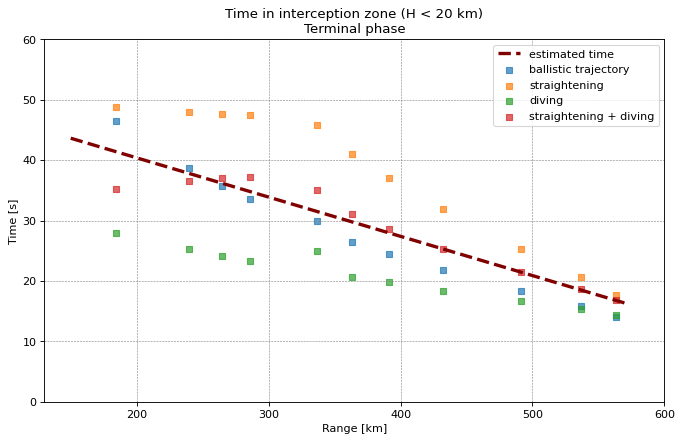

In [ ]:
#find line of best fit
X = range + range + range + range
Y = t_N + t_P + t_B + t_P_B
a, b = np.polyfit(X, Y, 1)


# figure size
plt.figure(figsize=(10,6), dpi=80)

# plotting
fig = plt.plot(np.array([150, 570]), np.multiply(a, np.array([150, 560])) + b, color='maroon', linestyle='--', linewidth=3)
plt.scatter(range, t_B, marker='s', alpha=0.7)
plt.scatter(range, t_P_B, marker='s', alpha=0.7)
plt.scatter(range, t_N, marker='s', alpha=0.7)
plt.scatter(range, t_P, marker='s', alpha=0.7)


# axis description and grid settings
ax = plt.gca()
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Time [s]')
plt.xlabel('Range [km]')

# axis settings
plt.xlim(130, 600)
plt.ylim(0, 60)

# legend description and figure title
plt.legend(['estimated time','ballistic trajectory', 'straightening', 'diving',  'straightening + diving'])
plt.title('Time in interception zone (H < 20 km)\nTerminal phase')

# show figure
plt.show()

# Footprint
- the outer edge of the region on the ground that can bereached by the re-entry vehicle

Load and manipulate data for 3 ranges

In [ ]:
# loading data from different simulations - first range
FOOTPRINT_10_N = load_matlab_file('FOOTPRINT_10_N')
FOOTPRINT_10_N_LEFT = load_matlab_file('FOOTPRINT_10_N_LEFT')
FOOTPRINT_10_B = load_matlab_file('10_B')
FOOTPRINT_10_B_LEFT = load_matlab_file('FOOTPRINT_10_B_LEFT')
FOOTPRINT_10_P = load_matlab_file('FOOTPRINT_10_P')
FOOTPRINT_10_P_LEFT = load_matlab_file('FOOTPRINT_10_P_LEFT')
FOOTPRINT_10_P_B = load_matlab_file('FOOTPRINT_10_P_B')
FOOTPRINT_10_P_B_LEFT = load_matlab_file('FOOTPRINT_10_P_B_LEFT')

footprint_10_df = pd.DataFrame({'x': [FOOTPRINT_10_N.x.values[-1]/1000,
                                      FOOTPRINT_10_N_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_10_B_LEFT.x.values[-1]/1000, 
                                      FOOTPRINT_10_P_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_10_P_B_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_10_P_B.x.values[-1]/1000,
                                      FOOTPRINT_10_P_B_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_10_P_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_10_B_LEFT.x.values[-1]/1000, 
                                      FOOTPRINT_10_N_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_10_N.x.values[-1]/1000,
                                      (FOOTPRINT_10_N.x.values[-1]/1000 + FOOTPRINT_10_P_B.x.values[-1]/1000)/2,

                                      ],
                                'y': [FOOTPRINT_10_N.y.values[-1]/1000,
                                      FOOTPRINT_10_N_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_10_B_LEFT.y.values[-1]/1000+1, 
                                      FOOTPRINT_10_P_LEFT.y.values[-1]/1000+10,
                                      FOOTPRINT_10_P_B_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_10_P_B.y.values[-1]/1000,
                                      -FOOTPRINT_10_P_B_LEFT.y.values[-1]/1000,
                                      -FOOTPRINT_10_P_LEFT.y.values[-1]/1000,
                                      -FOOTPRINT_10_B_LEFT.y.values[-1]/1000, 
                                      -FOOTPRINT_10_N_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_10_N.y.values[-1]/1000,
                                      FOOTPRINT_10_B.y.values[-1]/1000,
                                      ]})

# set central point of the footprint in the center of axes
footprint_10_df['x'] = footprint_10_df['x'] - (FOOTPRINT_10_N.x.values[-1]/1000 + FOOTPRINT_10_P_B.x.values[-1]/1000)/2

# Compute the (coefficients of) interpolating B-spline.
X_Y_Spline = make_interp_spline(footprint_10_df.x[1:6], footprint_10_df.y[1:6])
# Returns evenly spaced numbers over a specified interval.
X_10 = np.linspace(footprint_10_df.x[1:6].min(), footprint_10_df.x[1:6].max(), 500)
Y_10 = X_Y_Spline(X_10)


# loading data from different simulations - second range
FOOTPRINT_20_N = load_matlab_file('FOOTPRINT_20_N')
FOOTPRINT_20_N_LEFT = load_matlab_file('FOOTPRINT_20_N_LEFT')
FOOTPRINT_20_B = load_matlab_file('20_B')
FOOTPRINT_20_B_LEFT = load_matlab_file('FOOTPRINT_20_B_LEFT')
FOOTPRINT_20_P = load_matlab_file('FOOTPRINT_20_P')
FOOTPRINT_20_P_LEFT = load_matlab_file('FOOTPRINT_20_P_LEFT')
FOOTPRINT_20_P_B = load_matlab_file('20_P_B')
FOOTPRINT_20_P_B_LEFT = load_matlab_file('FOOTPRINT_20_P_B_LEFT')

# create DataFrame from loaded data: last value of x and y coordinate
footprint_20_df = pd.DataFrame({'x': [FOOTPRINT_20_N.x.values[-1]/1000,
                                      FOOTPRINT_20_N_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_20_B_LEFT.x.values[-1]/1000, 
                                      FOOTPRINT_20_P_B_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_20_P_B.x.values[-1]/1000,
                                      FOOTPRINT_20_P_B_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_20_B_LEFT.x.values[-1]/1000, 
                                      FOOTPRINT_20_N_LEFT.x.values[-1]/1000,
                                      (FOOTPRINT_20_N.x.values[-1]/1000 + FOOTPRINT_20_P_B.x.values[-1]/1000)/2,
                                      ],
                                'y': [FOOTPRINT_20_N.y.values[-1]/1000,
                                      FOOTPRINT_20_N_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_20_B_LEFT.y.values[-1]/1000, 
                                      FOOTPRINT_20_P_B_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_20_P_B.y.values[-1]/1000,
                                      -FOOTPRINT_20_P_B_LEFT.y.values[-1]/1000,
                                      -FOOTPRINT_20_B_LEFT.y.values[-1]/1000, 
                                      -FOOTPRINT_20_N_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_20_B.y.values[-1]/1000,
                                      ]})
# set central point of the footprint in the center of axes
footprint_20_df['x'] = footprint_20_df['x'] - (FOOTPRINT_20_N.x.values[-1]/1000 + FOOTPRINT_20_P_B.x.values[-1]/1000)/2

X_Y_Spline = make_interp_spline(footprint_20_df.x[1:5], footprint_20_df.y[1:5])
# Returns evenly spaced numbers over a specified interval.
X_20 = np.linspace(footprint_20_df.x[1:6].min(), footprint_20_df.x[1:6].max(), 500)
Y_20 = X_Y_Spline(X_20)


# loading data from different simulations - third range
FOOTPRINT_30_N = load_matlab_file('FOOTPRINT_30_N')
FOOTPRINT_30_N_LEFT = load_matlab_file('FOOTPRINT_30_N_LEFT')
FOOTPRINT_30_B = load_matlab_file('30_B')
FOOTPRINT_30_B_LEFT = load_matlab_file('FOOTPRINT_30_B_LEFT')
FOOTPRINT_30_P = load_matlab_file('FOOTPRINT_30_P')
FOOTPRINT_30_P_LEFT = load_matlab_file('FOOTPRINT_30_P_LEFT')
FOOTPRINT_30_P_B = load_matlab_file('30_P_B')
FOOTPRINT_30_P_B_LEFT = load_matlab_file('FOOTPRINT_30_P_B_LEFT')

# create DataFrame from loaded data: last value of x and y coordinate
footprint_30_df = pd.DataFrame({'x': [FOOTPRINT_30_N.x.values[-1]/1000,
                                      FOOTPRINT_30_N_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_30_B_LEFT.x.values[-1]/1000, 
                                      FOOTPRINT_30_P_B_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_30_P_B.x.values[-1]/1000,
                                      FOOTPRINT_30_P_B_LEFT.x.values[-1]/1000,
                                      FOOTPRINT_30_B_LEFT.x.values[-1]/1000, 
                                      FOOTPRINT_30_N_LEFT.x.values[-1]/1000,
                                      (FOOTPRINT_30_N.x.values[-1]/1000 + FOOTPRINT_30_P_B.x.values[-1]/1000)/2,
                                      ],
                                'y': [FOOTPRINT_30_N.y.values[-1]/1000,
                                      FOOTPRINT_30_N_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_30_B_LEFT.y.values[-1]/1000, 
                                      FOOTPRINT_30_P_B_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_30_P_B.y.values[-1]/1000,
                                      -FOOTPRINT_30_P_B_LEFT.y.values[-1]/1000,
                                      -FOOTPRINT_30_B_LEFT.y.values[-1]/1000, 
                                      -FOOTPRINT_30_N_LEFT.y.values[-1]/1000,
                                      FOOTPRINT_30_B.y.values[-1]/1000,
                                      ]})

# set central point of the footprint in the center of axes
footprint_30_df['x'] = footprint_30_df['x'] - (FOOTPRINT_30_N.x.values[-1]/1000 + FOOTPRINT_30_P_B.x.values[-1]/1000)/2

# Compute the (coefficients of) interpolating B-spline.
X_Y_Spline = make_interp_spline(footprint_30_df.x[1:5], footprint_30_df.y[1:5])

# Returns evenly spaced numbers
# over a specified interval.
X_30 = np.linspace(footprint_30_df.x[1:6].min(), footprint_30_df.x[1:6].max(), 500)
Y_30 = X_Y_Spline(X_30)

### Plotting comparison of footprint for 3 ranges

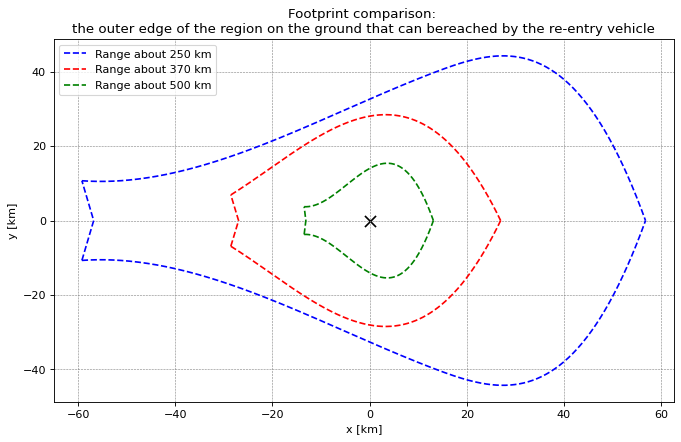

In [ ]:
# figure size
plt.figure(figsize=(10,6), dpi=80)

#  plotting
fig = plt.plot([footprint_10_df.x.values[9], footprint_10_df.x.values[0], footprint_10_df.x.values[1]], 
         [footprint_10_df.y.values[9], footprint_10_df.y.values[0], footprint_10_df.y.values[1]], 
         'b--')
plt.plot([footprint_20_df.x.values[7], footprint_20_df.x.values[0], footprint_20_df.x.values[1]], 
         [footprint_20_df.y.values[7], footprint_20_df.y.values[0], footprint_20_df.y.values[1]], 
         'r--')
plt.plot([footprint_30_df.x.values[7], footprint_30_df.x.values[0], footprint_30_df.x.values[1]], 
         [footprint_30_df.y.values[7], footprint_30_df.y.values[0], footprint_30_df.y.values[1]], 
         'g--')
plt.scatter(footprint_30_df.x.values[-1], footprint_30_df.y.values[-1], color='k', marker='x', s=100)
plt.plot(X_10, Y_10, 'b--', X_10, -Y_10, 'b--')
plt.plot(X_20, Y_20, 'r--', X_20, -Y_20, 'r--')
plt.plot(X_30, Y_30, 'g--', X_30, -Y_30, 'g--')


# axis description and grid settings
ax = plt.gca()
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('y [km]')
plt.xlabel('x [km]');

# figure title and legend
plt.title("Footprint comparison: \nthe outer edge of the region on the ground that can bereached by the re-entry vehicle")
plt.legend(['Range about 250 km', 'Range about 370 km','Range about 500 km'])

# show figure
plt.show()

Velocity in all phases for difrent ranges

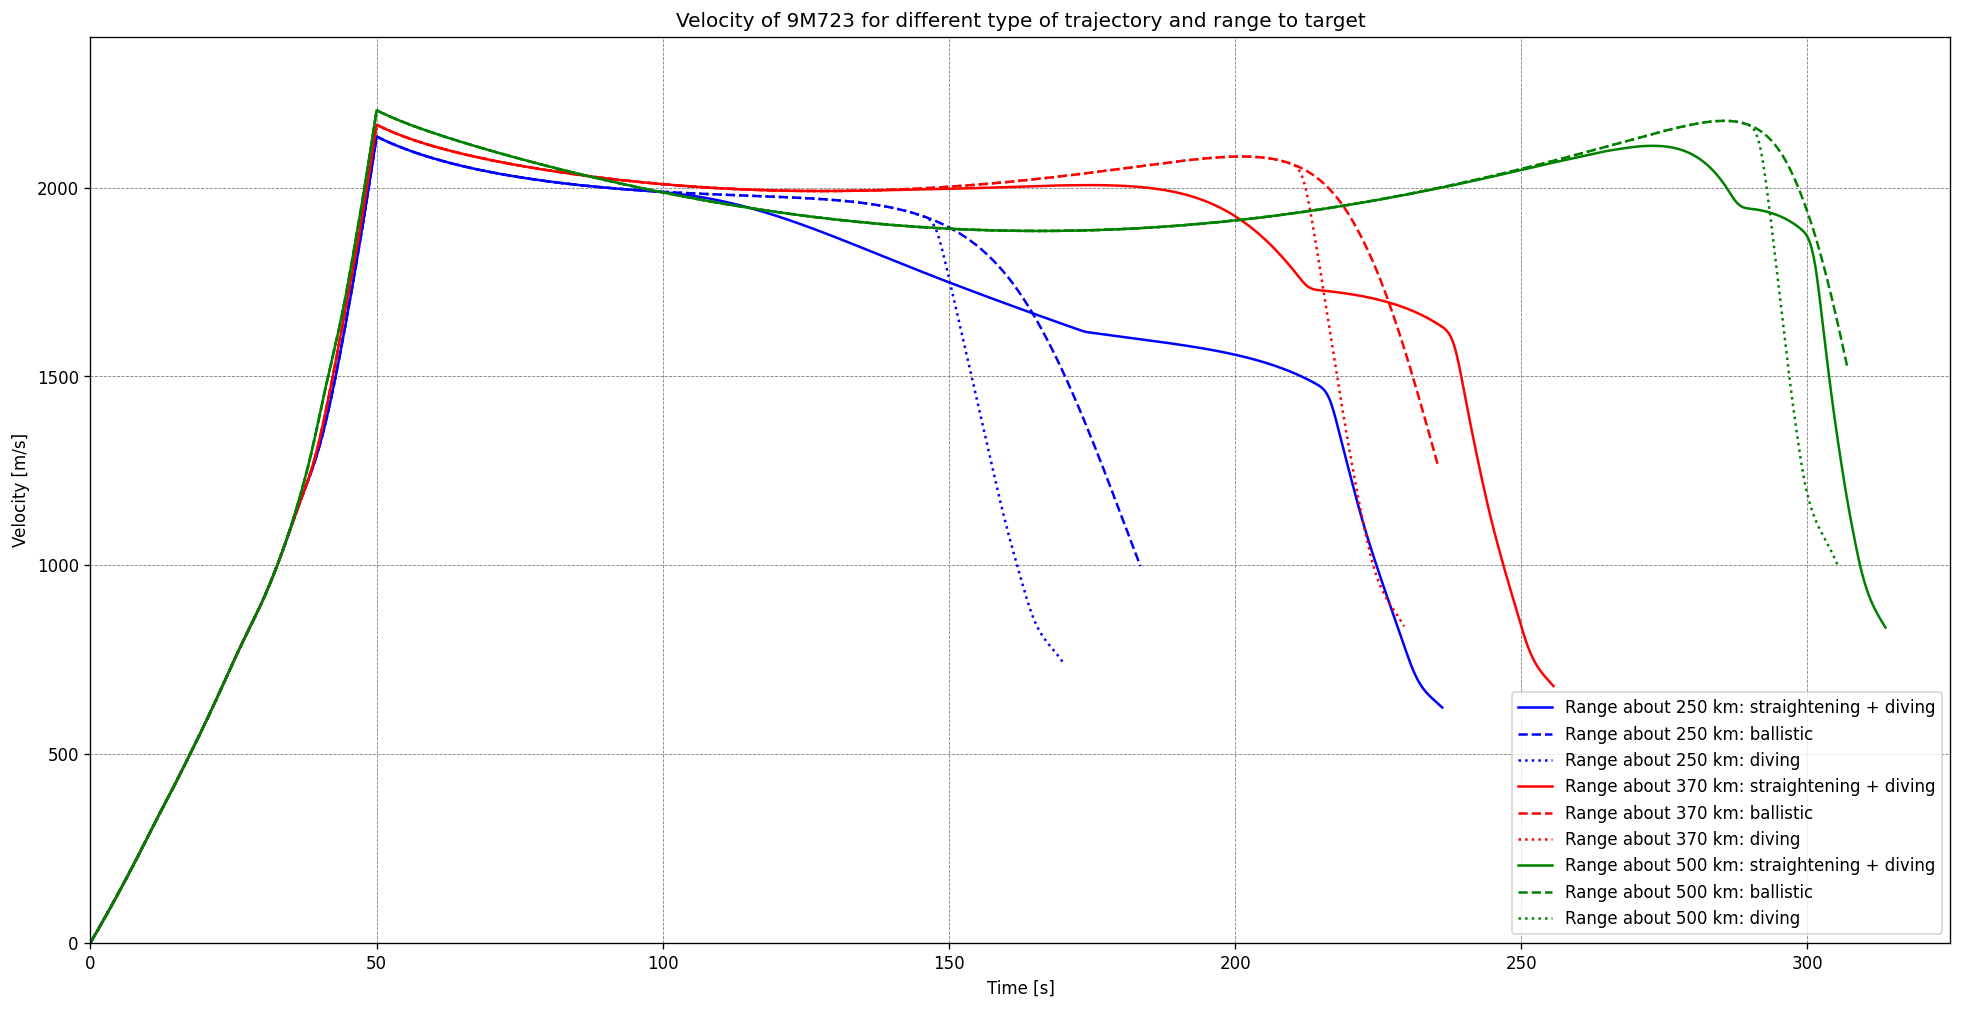

In [ ]:
# size of the figure
plt.figure(figsize=(20,10), dpi=120)

# plotting
fig = plt.plot(P_10.t, P_10['|V|'], 'b')
plt.plot(B_10.t, B_10['|V|'], 'b--')
plt.plot(N_10.t, N_10['|V|'], 'b:')
plt.plot(P_20.t, P_20['|V|'], 'r')
plt.plot(B_20.t, B_20['|V|'], 'r--')
plt.plot(N_20.t, N_20['|V|'], 'r:')
plt.plot(P_30.t, P_30['|V|'], 'g')
plt.plot(B_30.t, B_30['|V|'], 'g--')
plt.plot(N_30.t, N_30['|V|'], 'g:')

# axis settings
plt.xlim(0, 325)
plt.ylim(0, 2400)

# axis description and grid settings
ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.xlabel('Time [s]')

# figure title
plt.title('Velocity of 9M723 for different type of trajectory and range to target')
plt.legend(['Range about 250 km: straightening + diving', 'Range about 250 km: ballistic', 'Range about 250 km: diving',
            'Range about 370 km: straightening + diving', 'Range about 370 km: ballistic', 'Range about 370 km: diving',
            'Range about 500 km: straightening + diving', 'Range about 500 km: ballistic', 'Range about 500 km: diving'])

# show figure
plt.show()